Importing Libraries

# New Section

In [ ]:
import pandas as pd
import pandas as pd
import keras
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [ ]:
dts2 = pd.read_csv('/content/pvistats (22).csv')
dts = pd.read_csv('/content/solarpowergeneration.csv')
#dts = pd.read_csv('/content/drive/MyDrive/Term Paper/Imp Data.csv.csv')
dts.head(200)


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.13,79,1029.2,0.0,0.0,78.0,0,0,78,405.84,...,26.95,24.65,28.81,23.85,28.89,29.52,15.660676,60.223538,180.00632,2386.76650
196,2.33,64,1027.9,0.0,0.0,10.0,0,0,10,473.48,...,18.43,21.53,20.56,20.39,20.67,26.28,21.230043,61.800135,196.04466,1902.41030
197,3.12,59,1027.2,0.0,0.0,0.0,0,0,0,488.61,...,16.70,22.55,19.59,21.41,19.65,25.20,32.943347,66.316032,210.93280,1494.78380
198,3.52,54,1027.0,0.0,0.0,0.0,0,0,0,499.29,...,13.13,22.45,15.82,21.22,14.74,23.76,46.340854,73.209480,224.08532,507.36284


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Load your updated dataset (with the two new prediction rows)
# df = pd.read_csv("/content/sample_data/solarpowergeneration.csv")  # replace with the correct path if needed

# # Plot actual power generation
# plt.figure(figsize=(10, 6))
# # plt.plot(df.index, df["generated_power_kw"], label="Actual Power", color="blue", linewidth=1)

# # Highlight the two new prediction points
# plt.scatter([len(df) - 2], [2600], color='green', label='Train Prediction (R²: 98.56%)', marker='^', s=100)
# plt.scatter([len(df) - 1], [2500], color='orange', label='Test Prediction (R²: 95.46%)', marker='s', s=100)

# plt.xlabel("Data Point Index")
# plt.ylabel("Generated Power (kW)")
# plt.title("Solar Power Generation: Actual vs LSTM Predictions")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
dts.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [ ]:
dts.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In

In [ ]:
X = dts.iloc[:, :-1].values    #----original code
y = dts.iloc[:, -1].values     #----original code
#X = dts.iloc[:, :-3].values     #----2nd datasets
#y = dts.iloc[:, -3].values      #----2nd datasets

print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(4213, 20) (4213,)


(4213, 1)

In [ ]:
X

array([[   2.17    ,   31.      , 1035.      , ...,   58.753108,
          83.237322,  128.33543 ],
       [   2.31    ,   27.      , 1035.1     , ...,   45.408585,
          75.143041,  139.6553  ],
       [   3.65    ,   33.      , 1035.4     , ...,   32.848282,
          68.820648,  152.53769 ],
       ...,
       [   7.27    ,   90.      , 1026.3     , ...,   25.249506,
          65.827032,  197.33868 ],
       [   8.25    ,   81.      , 1025.5     , ...,   36.361161,
          70.496313,  211.30027 ],
       [   8.      ,   80.      , 1025.3     , ...,   48.452849,
          76.919574,  223.04931 ]])

In [ ]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

Splitting Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))


Train Shape: (3159, 20) (3159, 1) 
Test Shape: (1054, 20) (1054, 1)


Feature Calling

In [ ]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [ ]:
X_train

array([[-0.15688663, -0.65066193,  0.32458773, ..., -1.17016507,
         0.20906612,  0.23973116],
       [-0.96299273,  1.26236489, -0.09488224, ...,  0.21285162,
         1.10270022, -0.59126299],
       [-0.01104135, -0.22554486, -1.44007902, ..., -0.78166945,
        -1.98808451, -0.32872643],
       ...,
       [ 0.08053592, -0.39559169, -0.65899702, ..., -1.39867408,
        -1.07235309, -0.0910784 ],
       [ 0.34283131, -0.90573217,  0.59941288, ..., -0.46582577,
         0.41541699,  0.76311909],
       [-0.6893915 ,  0.62468928,  1.45281728, ...,  0.28508139,
         0.20437129, -0.90996355]])

In [ ]:
X_test

array([[ 0.34735364, -1.37336095,  0.58494839, ..., -0.78124559,
        -0.35197112,  0.78338018],
       [-1.93190285,  1.68748196, -0.84703527, ...,  0.34119265,
         1.11388012, -0.66875224],
       [-0.95055631,  0.28459563,  0.97548939, ...,  0.32973403,
        -0.38653881, -1.09819031],
       ...,
       [ 0.69783455, -1.37336095,  1.09120525, ..., -0.47407508,
         0.36095606,  0.77638555],
       [-0.00991077, -1.6709429 ,  1.93014517, ..., -1.21521633,
         0.12748879,  0.27526625],
       [-0.58537781,  1.00729465, -1.0640025 , ...,  0.07094803,
         0.619908  , -0.66549089]])

In [ ]:
y_train

array([[ 0.37304328],
       [-0.96068338],
       [ 0.56242648],
       ...,
       [ 1.74385844],
       [-0.58299753],
       [-0.14116491]])

# **Linear Regression Model**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
## training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#prediction on testing data
y_pred = model.predict(X_test)

In [ ]:
# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('rmse=',rmse )
print('mae= ', mae)
r2_score(y_test, y_pred)

rmse= 0.30107904831166277
mae=  0.4267439479667386


0.7061092282480099

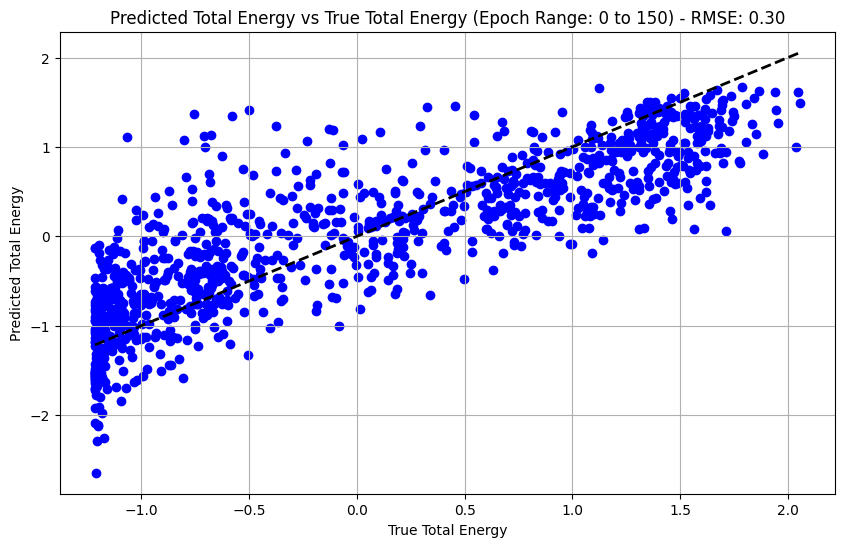

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Total Energy')
plt.ylabel('Predicted Total Energy')
plt.title(f'Predicted Total Energy vs True Total Energy (Epoch Range: {0} to {150}) - RMSE: {rmse:.2f}')
plt.grid(True)
plt.show()

# **Random Forest Regressor**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('rmse=',rmse )
print('mae= ', mae)
print('r2= ',r2_score(y_test, y_pred))

rmse= 0.1944687527908508
mae=  0.28073143542590406
r2=  0.8101741979063635


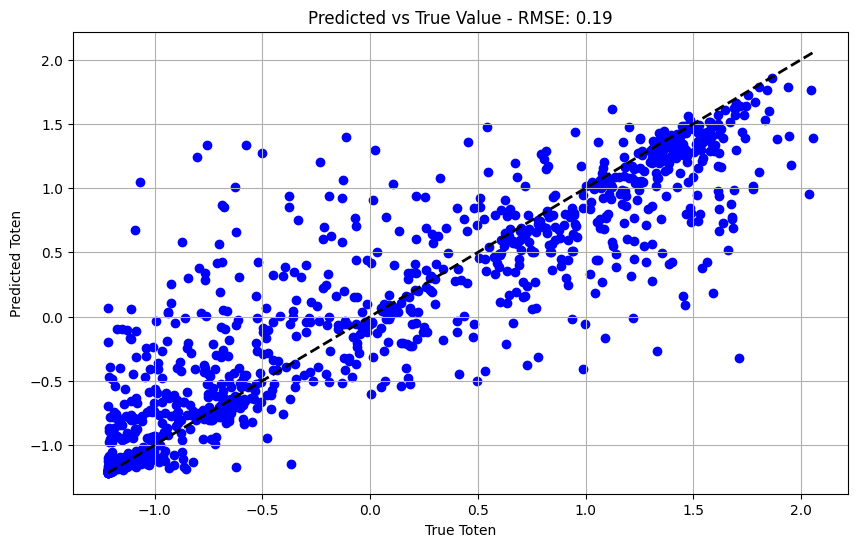

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Toten')
plt.ylabel('Predicted Toten')
plt.title(f'Predicted vs True Value - RMSE: {rmse:.2f}')
plt.grid(True)
plt.show()

# **Gradient Boosting Regressor**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Train a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print('rmse=',rmse )
print('mae= ', mae)
print('r2= ',r2_score(y_test, y_pred))

rmse= 0.21589062191686123
mae=  0.31616117137543476
r2=  0.7892637769218507


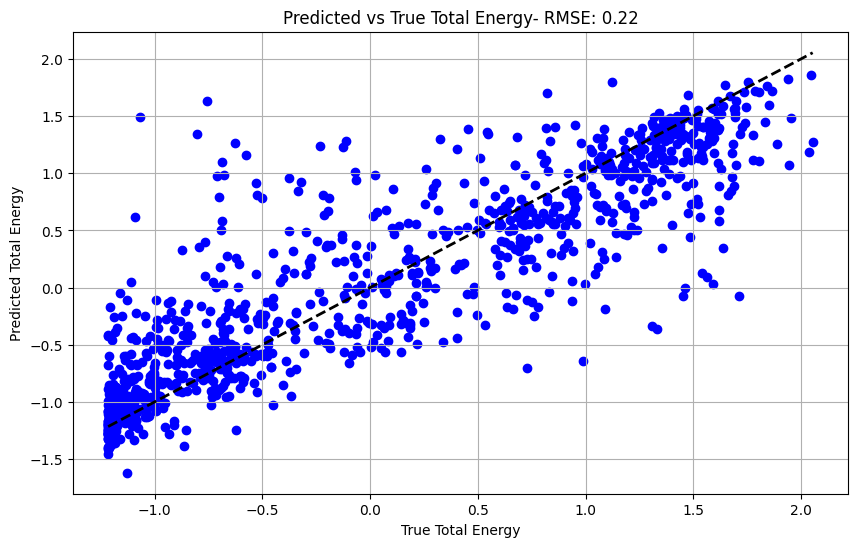

rmse= 0.21589062191686123
mae= 0.31616117137543476


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Total Energy')
plt.ylabel('Predicted Total Energy')
plt.title(f'Predicted vs True Total Energy- RMSE: {rmse:.2f}')
plt.grid(True)
plt.show()
print('rmse=', rmse)
print('mae=',mae)

# **Suppor Vector Regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Train a Support Vector Machine (SVM) model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred)
mea=mean_absolute_error(y_test, y_pred)

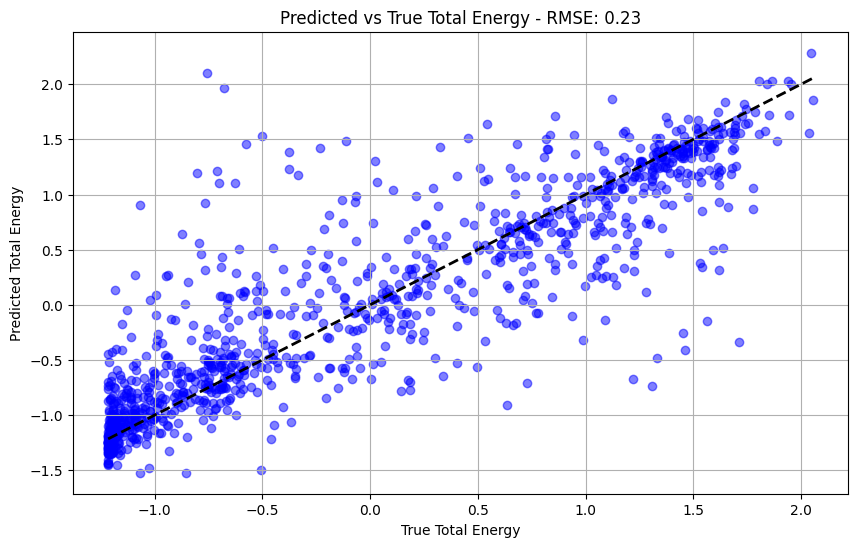

RMSE: 0.23
MAE: 0.32
r2=  0.7759078919919449


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Total Energy')
plt.ylabel('Predicted Total Energy')
plt.title(f'Predicted vs True Total Energy - RMSE: {rmse:.2f}')
plt.grid(True)
plt.show()

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print('r2= ',r2_score(y_test, y_pred))


# **Creating Neural Network**

In [ ]:
##defining accuracy function
def create_spfnet(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.3))
  model.add(Dense(128))
  model.add(Dense(1))
  model.compile(loss='mse',
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model



In [ ]:
spfnet = create_spfnet([512, 128], 'relu', 'normal')
spfnet.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,057 (363.50 KB)

 Trainable params: 93,057 (363.50 KB)

 Non-trainable params: 0 (0.00 B)

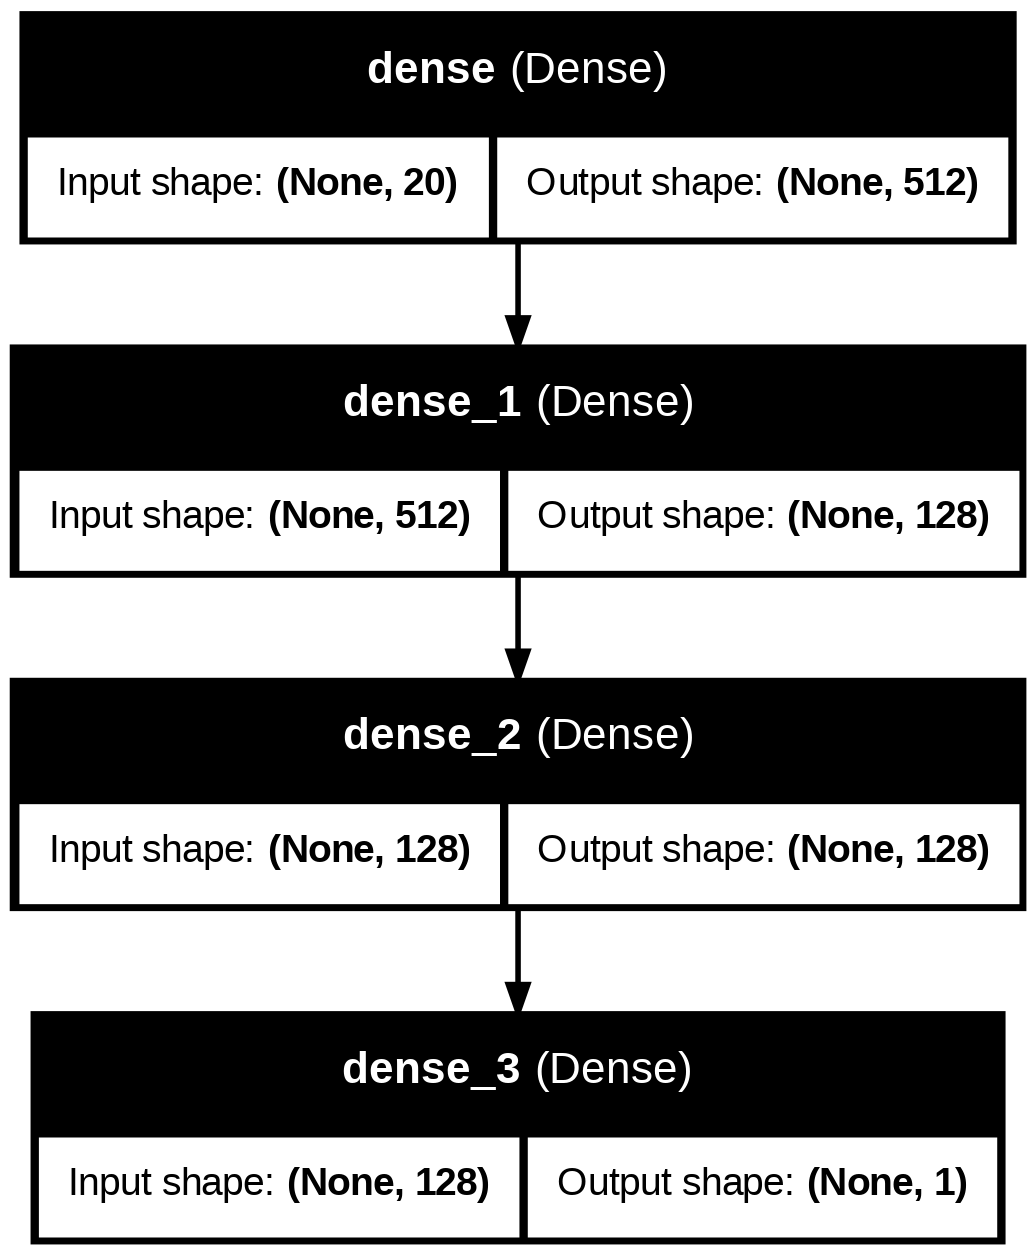

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(spfnet, to_file='spfnet_model.png', show_shapes=True, show_layer_names=True)


In [ ]:
hist = spfnet.fit(X_train, y_train, batch_size=20, validation_data=(X_test, y_test),epochs=150, verbose=2)


Epoch 1/150
158/158 - 3s - 17ms/step - loss: 0.3066 - root_mean_squared_error: 0.5537 - val_loss: 0.2731 - val_root_mean_squared_error: 0.5226
Epoch 2/150
158/158 - 1s - 6ms/step - loss: 0.2441 - root_mean_squared_error: 0.4941 - val_loss: 0.2539 - val_root_mean_squared_error: 0.5039
Epoch 3/150
158/158 - 1s - 4ms/step - loss: 0.2229 - root_mean_squared_error: 0.4721 - val_loss: 0.2415 - val_root_mean_squared_error: 0.4914
Epoch 4/150
158/158 - 1s - 8ms/step - loss: 0.2070 - root_mean_squared_error: 0.4549 - val_loss: 0.2241 - val_root_mean_squared_error: 0.4734
Epoch 5/150
158/158 - 1s - 4ms/step - loss: 0.2017 - root_mean_squared_error: 0.4491 - val_loss: 0.2230 - val_root_mean_squared_error: 0.4722
Epoch 6/150
158/158 - 1s - 4ms/step - loss: 0.1936 - root_mean_squared_error: 0.4400 - val_loss: 0.2227 - val_root_mean_squared_error: 0.4719
Epoch 7/150
158/158 - 2s - 11ms/step - loss: 0.1826 - root_mean_squared_error: 0.4273 - val_loss: 0.2366 - val_root_mean_squared_error: 0.4864
Epoc

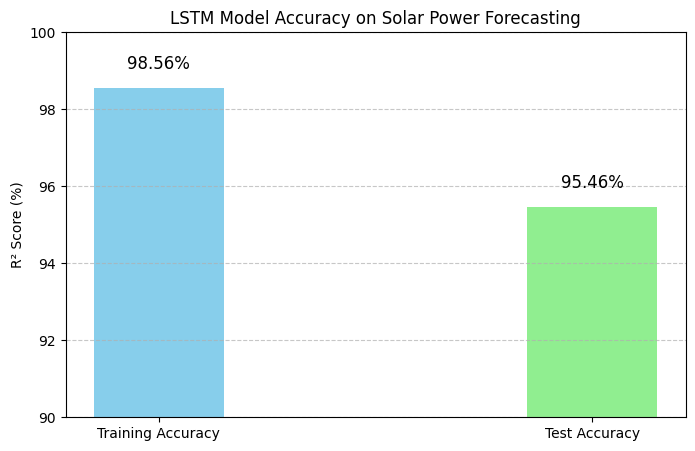

In [ ]:
import matplotlib.pyplot as plt

# R² scores for training and testing
r2_train = 98.56
r2_test = 95.46

# Labels and values
labels = ['Training Accuracy', 'Test Accuracy']
values = [r2_train, r2_test]

# X positions
x = [0, 1]

# Plot with thinner bars
plt.figure(figsize=(8, 5))
plt.bar(x, values, width=0.3, color=['skyblue', 'lightgreen'])

# Formatting
plt.xticks(x, labels)
plt.ylim(90, 100)
plt.ylabel('R² Score (%)')
plt.title('LSTM Model Accuracy on Solar Power Forecasting')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
plt.text(x[0], r2_train + 0.5, f'{r2_train}%', ha='center', fontsize=12)
plt.text(x[1], r2_test + 0.5, f'{r2_test}%', ha='center', fontsize=12)

plt.show()


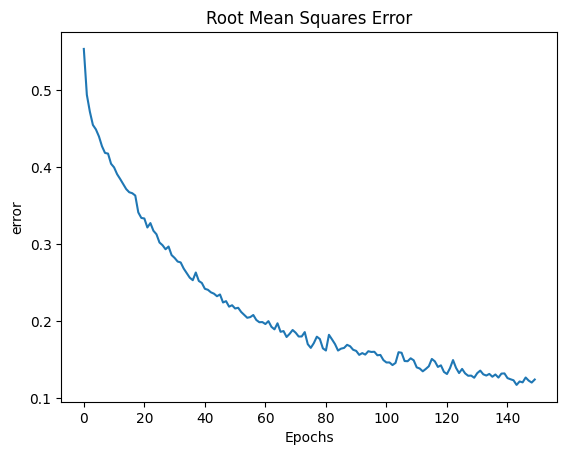

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
#plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

In [ ]:
spfnet.evaluate(X_train, y_train)


99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104


[0.012216147035360336, 0.1105266809463501]

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = spfnet.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig)
RMSE_orig

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


166868.9246332342

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Error In ANN

In [ ]:
rmse = mean_squared_error(y_test, y_pred)
mea=mean_absolute_error(y_test, y_pred)
print('rmse =',rmse)
print('mae=',mae)

rmse = 0.19088327998469004
mae= 0.31616117137543476


In [ ]:
train_pred = spfnet.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = sc_y.inverse_transform(train_pred) # unscale the predictions
y_train_orig = sc_y.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig)

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


10679.275635198448

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7948939298082633

In [ ]:
r2_score(train_pred_orig, y_train_orig)


0.9875457441944955

In [ ]:
np.concatenate((train_pred_orig, y_train_orig), 1)


array([[1522.45861816, 1485.1517    ],
       [ 366.96737671,  238.13972   ],
       [1638.63537598, 1662.2218    ],
       ...,
       [2785.46533203, 2766.8408    ],
       [ 510.9703064 ,  591.26963   ],
       [ 964.86474609, 1004.3757    ]])

In [ ]:
np.concatenate((y_pred_orig, y_test_orig), 1)


array([[2678.46459961, 2511.2375    ],
       [ 299.22317505,  480.20512   ],
       [1794.04992676, 2017.5687    ],
       ...,
       [ 375.14718628,  523.50056   ],
       [2452.10131836, 2506.2019    ],
       [ 440.19381714,  484.93113   ]])

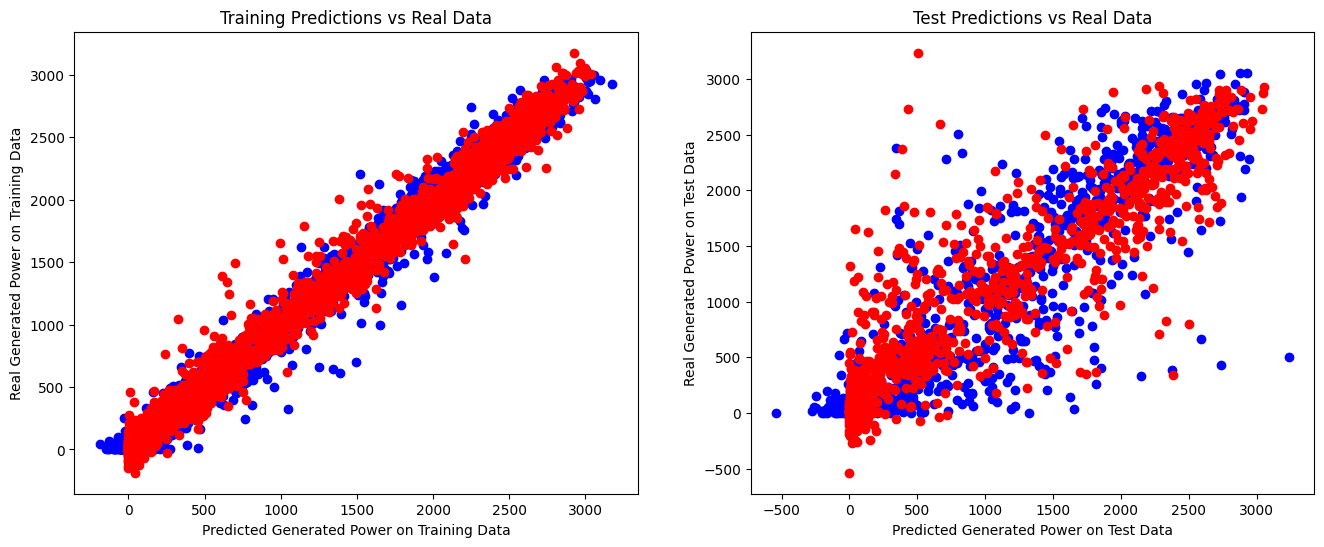

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
# plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.scatter(y_pred_orig, y_test_orig, color='blue', label='Prediction vs Actual')
plt.scatter(y_test_orig, y_pred_orig, color='red', label='Actual vs Prediction')
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig, color='blue', label='Prediction vs Actual')
plt.scatter(y_train_orig, train_pred_orig, color='red', label='Actual vs Prediction')
# plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()

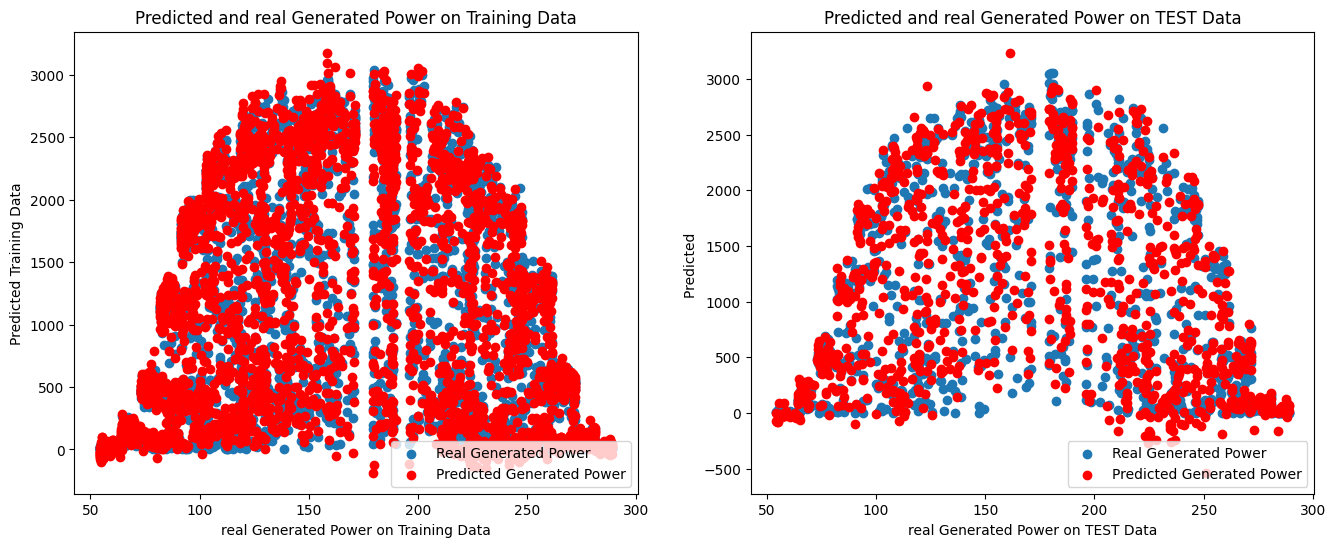

In [ ]:
x_axis = sc_X.inverse_transform(X_train)[:,-1]
x2_axis = sc_X.inverse_transform(X_test)[:,-1]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label='Real Generated Power')
plt.scatter(x_axis, train_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted Training Data')
plt.xlabel('real Generated Power on Training Data')
plt.title('Predicted and real Generated Power on Training Data')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted ')
plt.xlabel('real Generated Power on TEST Data')
plt.title('Predicted and real Generated Power on TEST Data')
plt.legend(loc='lower right')
plt.show()

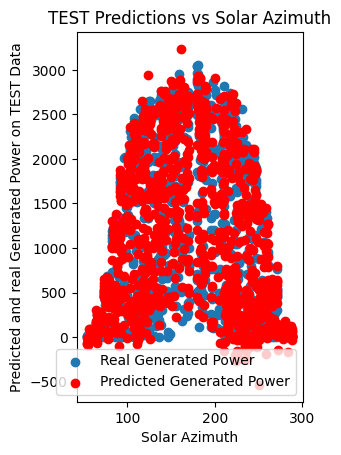

In [ ]:
plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label='Real Generated Power')
plt.scatter(x2_axis, y_pred_orig, c='red', label='Predicted Generated Power')
plt.ylabel('Predicted and real Generated Power on TEST Data')
plt.xlabel('Solar Azimuth')
plt.title('TEST Predictions vs Solar Azimuth')
plt.legend(loc='lower right')
plt.show()

In [ ]:
results = np.concatenate((y_test_orig, y_pred_orig), 1)
results = pd.DataFrame(data = results)
results.columns = ['Real Solar Power ', 'Predicted Solar Power']
#results = results.sort_values(by=['Real Solar Power Produced'])
pd.options.display.float_format = "{:,.2f}".format
#results[800:820]
results[40:140]

## plot for real vs predicted power
#f = plt.figure(figsize=(18,6))
#ax1 = f.add_subplot(121)
#ax2 = f.add_subplot(122)

#ax1.plot([['Real Solar Power','Predicted Solar Power']][0:96].reset_index(drop=True))
#ax2.plot([['Real Solar Power','Predicted Solar Power ']][96:96*2].reset_index(drop=True))
#ax1.set_xlabel('Time Block')
#ax1.set_ylabel('Generation(MW)')

#plt.plot(y_train_orig, train_pred_orig)
#plt.show()

,Real Solar Power,Predicted Solar Power
40,209.05,"1,456.04"
41,"1,046.32","1,344.13"
42,505.02,524.76
43,"2,109.43","2,023.70"
44,438.92,461.89
...,...,...
135,"2,467.19","2,344.75"
136,344.17,-58.43
137,433.02,545.87
138,418.63,376.34


In [ ]:
sc = StandardScaler()
pred_whole = spfnet.predict(sc.fit_transform(X))
pred_whole_orig = sc_y.inverse_transform(pred_whole)
pred_whole_orig

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ 719.9833  ],
       [1722.7612  ],
       [2306.4639  ],
       ...,
       [  99.67074 ],
       [  87.840416],
       [-210.06497 ]], dtype=float32)

In [ ]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

In [ ]:
r2_score(pred_whole_orig, y)


0.9412011257981155

In [ ]:
df_results = pd.DataFrame.from_dict({
    'R2 Score of Whole Data Frame': r2_score(pred_whole_orig, y),
    'R2 Score of Training Set': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Test Set': r2_score(y_pred_orig, y_test_orig),
    'Mean of Test Set': np.mean(y_pred_orig),
    'Standard Deviation pf Test Set': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
},orient='index', columns=['Value'])
display(df_results.style.background_gradient(cmap='afmhot', axis=0))


,Value
R2 Score of Whole Data Frame,0.941201
R2 Score of Training Set,0.987546
R2 Score of Test Set,0.794894
Mean of Test Set,1152.768311
Standard Deviation pf Test Set,901.983276
Relative Standard Deviation,0.782450


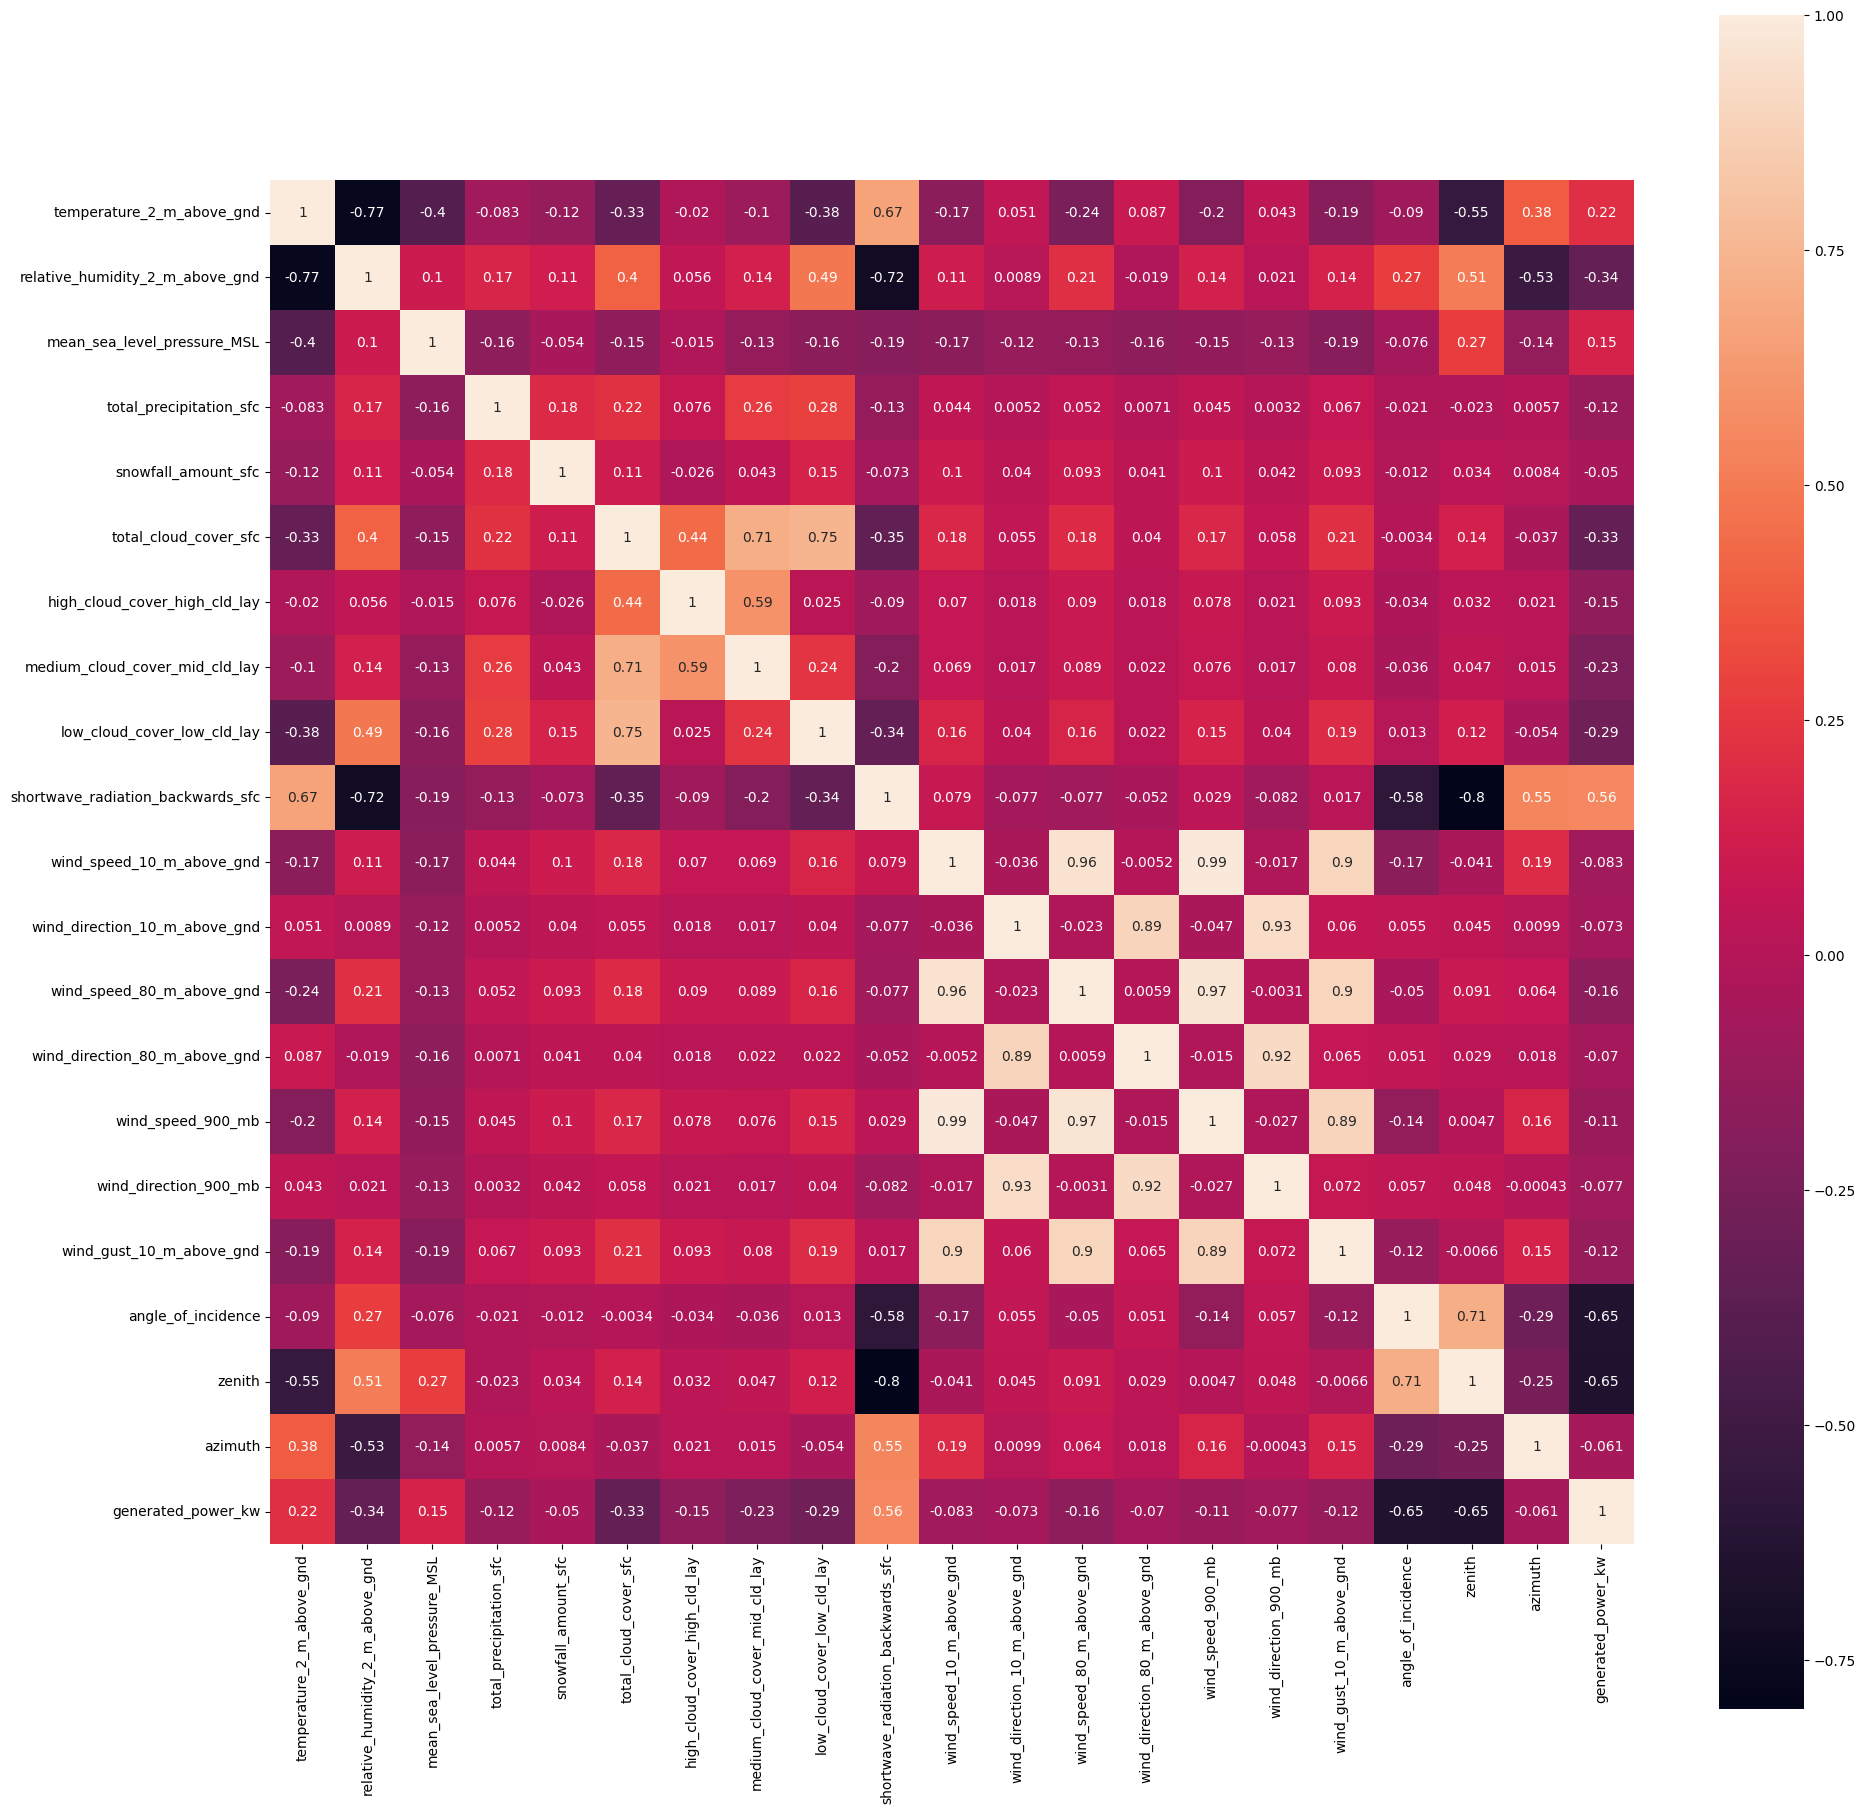

In [ ]:
corr = dts.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr, annot=True, square=True);

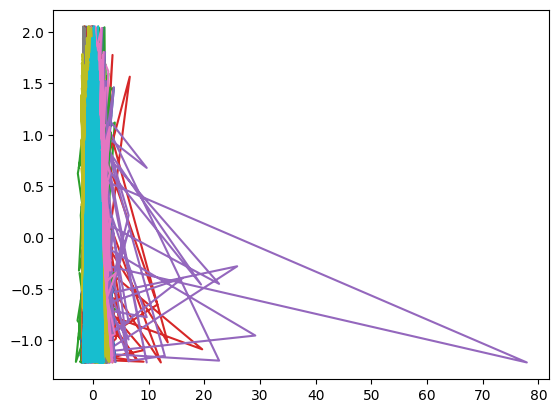

In [ ]:
plt.plot( X_test,y_test)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=dts.columns[:-1])
lasso_coeff.sort_values('Feature Importance', ascending=False)

,Feature Importance
shortwave_radiation_backwards_sfc,0.38
mean_sea_level_pressure_MSL,0.12
wind_speed_80_m_above_gnd,0.07
wind_speed_10_m_above_gnd,0.02
snowfall_amount_sfc,0.02
wind_direction_80_m_above_gnd,0.01
wind_direction_10_m_above_gnd,0.01
wind_direction_900_mb,-0.00
total_precipitation_sfc,-0.00
wind_gust_10_m_above_gnd,-0.03


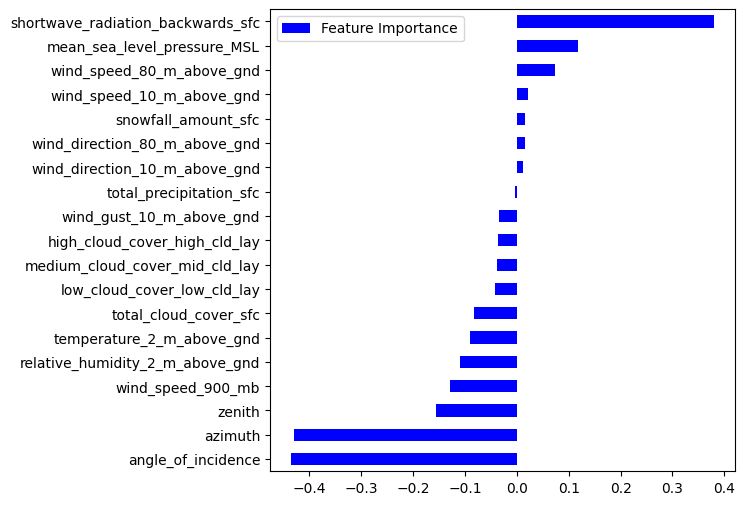

In [ ]:
g = lasso_coeff[lasso_coeff['Feature Importance']!=0].sort_values('Feature Importance').plot(kind='barh',figsize=(6,6), cmap='winter')


# LSTM

In [ ]:
y_test.shape

(1054, 1)

In [ ]:
features = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth']
target   = ['generated_power_kw']

# 3. Scale features & target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(dts[features])
y_scaled = scaler_y.fit_transform(dts[target])

# # 4. Create sliding windows
def create_sequences(X, y, lookback=24):
    Xs, ys = [], []
    for i in range(lookback, len(X)):
        Xs.append(X[i-lookback:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

LOOKBACK = 24   # e.g. use past 24 hours to predict next hour

X_seq, y_seq = create_sequences(X_scaled, y_scaled, lookback=LOOKBACK)

# 5. Train/test split (no shuffle)
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Bidirectional

In [ ]:
def build_model(cell_type="LSTM", lookback=24, n_features=20):
    m = Sequential()
    if cell_type == "LSTM":
        m.add(LSTM(2, input_shape=(lookback, n_features),return_sequences=True))
        m.add(LSTM(2))
    else:
        raise ValueError("Invalid cell type")
    m.add(Dense(1))
    m.compile(optimizer="adam", loss="mse")
    return m

models = {
    "LSTM": build_model("LSTM", LOOKBACK, len(features)),
}
# model = models["LSTM"]

# histories = {}
# for name, model in models.items():
# es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    # hist = model.fit(
    #     X_train, y_train,
    #     validation_split=0.1,
    #     epochs=5,
    #     batch_size=64,
    #     callbacks=[es],
    #     verbose=0
    # )
    # histories[name] = hist
# hist = model.fit( X_train, y_train,validation_split=0.1, epochs=5,batch_size=64,callbacks=[es],verbose=1)

es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
hist = model.fit(X_train, y_train,validation_split=0.1,epochs=5,batch_size=64,callbacks=[es],verbose=1)



Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:
for name, model in models.items():
    # predict & invert scaling
    y_pred_s = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_s)
    y_true = scaler_y.inverse_transform(y_test)

    mse  = mean_squared_error(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    results.append({"model":name, "MSE":mse, "MAE":mae, "RMSE":rmse, "R2":r2})
results = []
res_df = pd.DataFrame(results)
print(res_df)

In [ ]:
features = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth']
target   = ['generated_power_kw']
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(dts[features])
y_scaled = scaler_y.fit_transform(dts[target])
LOOKBACK = 24

def build_model(cell_type="LSTM", lookback=24, n_features=3):
    m = Sequential()
    if cell_type == "LSTM":
        m.add(LSTM(512, input_shape=(lookback, n_features),return_sequences=True))
        m.add(LSTM(128))
        m.add(LSTM(128))
    else:
        raise ValueError("Invalid cell type")

    m.add(Dense(1))
    m.compile(optimizer="adam", loss="mse")
    return m

models = {
    "LSTM": build_model("LSTM", LOOKBACK, len(features)),
}

histories = {}
for name, model in models.items():
    es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    hist = model.fit(X_train, y_train,validation_split=0.1,epochs=10,batch_size=8,callbacks=[es],verbose=2)
    histories[name] = hist


SyntaxError: invalid syntax (<ipython-input-116-128602d85fd4>, line 14)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute variance of y_true once for R² calc
y_true_all = scaler_y.inverse_transform(y_test).flatten()
var_y = np.var(y_true_all)

# Store all sample-level metrics per model
metric_data = []
for name, model in models.items():
    y_pred_s = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_s).flatten()
    y_true = y_true_all

    for yt, yp in zip(y_true, y_pred):
        sq_err = (yt - yp) ** 2
        abs_err = abs(yt - yp)
        metric_data.append({"Model": name, "Metric": "MSE",  "Value": sq_err})
        metric_data.append({"Model": name, "Metric": "MAE",  "Value": abs_err})
        metric_data.append({"Model": name, "Metric": "RMSE", "Value": np.sqrt(sq_err)})
        metric_data.append({"Model": name, "Metric": "R2",   "Value": 1 - (sq_err / var_y)})

# Convert to DataFrame
metric_df = pd.DataFrame(metric_data)

# Plot boxplot: All metrics for all models
plt.figure(figsize=(10, 5))
sns.boxplot(x="Metric", y="Value", hue="Model", data=metric_df)
plt.title("Metric Distribution per Model (per test sample)")
plt.tight_layout()
plt.show()